# Machine Learning - Project
# Cryptocurrency Prediction Model - Bitcoin Prediction

# DownLoading Bitcoin Price Data

In [1]:
!pip install yfinance 

In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [5]:
#there are not actually close open price or dividends for bitcoin but as it tracks stocks
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-21 00:00:00+00:00,28249.230469,28349.968750,27177.365234,27276.910156,20759504330,0.0,0.0
2023-04-22 00:00:00+00:00,27265.894531,27872.142578,27169.570312,27817.500000,13125734602,0.0,0.0
2023-04-23 00:00:00+00:00,27816.144531,27820.244141,27400.314453,27591.384766,12785446832,0.0,0.0


In [6]:
#convert index to a date time index
btc.index = pd.to_datetime(btc.index)

In [7]:
#delet the below coloums 
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
#cloum names to lower case
btc.columns = [c.lower() for c in btc.columns]

<AxesSubplot:xlabel='Date'>

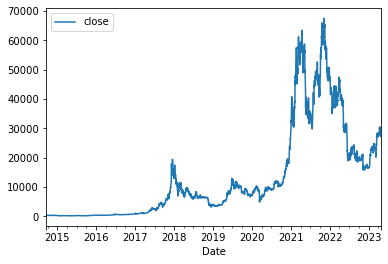

In [9]:
#ploting closing price
btc.plot.line(y="close", use_index=True)

In [15]:
#combine bitcoin data with wiki data
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [16]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-04-21,0.300000,-0.165715,0.183333
2023-04-22,0.233333,-0.166121,0.183333
2023-04-23,0.233333,-0.166121,0.183333
2023-04-24,0.233333,-0.166121,0.183333


In [11]:
btc = pd.read_csv(r'C:\Users\manas\Downloads\btc.csv', index_col=0, parse_dates=True)

<ipython-input-11-b7dc03178fe4>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  btc = pd.read_csv(r'C:\Users\manas\Downloads\btc.csv', index_col=0, parse_dates=True)


# Preparing Data for Machine Learning

Merge bitcoin price data with wikipedia edit data

In [17]:
# merging data frame with same dates

btc = btc.merge(wiki, left_index=True, right_index=True)

In [13]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07,0,0,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07,0,0,5.066667,-0.232759,0.532718
2014-09-19,424.102997,427.834992,384.532013,394.795990,3.791970e+07,0,0,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07,0,0,5.200000,-0.233185,0.549385
2014-09-21,408.084992,412.425995,393.181000,398.821014,2.658010e+07,0,0,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19832.470700,19999.689450,19636.816410,19986.712890,2.524586e+10,0,0,0.400000,-0.108480,0.150000
2022-09-05,19988.789060,20031.160160,19673.046880,19812.371090,2.881346e+10,0,0,0.400000,-0.108480,0.150000
2022-09-06,19817.724610,20155.269530,18800.171880,18837.667970,4.340398e+10,0,0,0.433333,-0.081502,0.150000
2022-09-07,18837.683590,19427.171880,18644.466800,19290.324220,3.523976e+10,0,0,0.433333,-0.081502,0.150000


Above data includes both wiki and price data

We will predict will the price go up or down tomorrow here will look at the direction of the price 

1-if price went up and 0-if price went down

In [19]:
btc["tomorrow"] = btc["Close"].shift(-1)

In [20]:
btc["target"] = (btc["tomorrow"] > btc["Close"]).astype(int)

In [21]:
#not imbalance
btc["target"].value_counts()

target
1    1563
0    1351
Name: count, dtype: int64

In [24]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,edit_count_x,sentiment_x,neg_sentiment_x,edit_count_y,sentiment_y,neg_sentiment_y,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07,0,0,5.033333,-0.232191,0.532718,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07,0,0,5.066667,-0.232759,0.532718,5.066667,-0.232759,0.532718,394.795990,0
2014-09-19,424.102997,427.834992,384.532013,394.795990,3.791970e+07,0,0,5.200000,-0.235415,0.549385,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07,0,0,5.200000,-0.233185,0.549385,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084992,412.425995,393.181000,398.821014,2.658010e+07,0,0,5.233333,-0.204017,0.532718,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19832.470700,19999.689450,19636.816410,19986.712890,2.524586e+10,0,0,0.400000,-0.108480,0.150000,0.400000,-0.108480,0.150000,19812.371090,0
2022-09-05,19988.789060,20031.160160,19673.046880,19812.371090,2.881346e+10,0,0,0.400000,-0.108480,0.150000,0.400000,-0.108480,0.150000,18837.667970,0
2022-09-06,19817.724610,20155.269530,18800.171880,18837.667970,4.340398e+10,0,0,0.433333,-0.081502,0.150000,0.433333,-0.081502,0.150000,19290.324220,1
2022-09-07,18837.683590,19427.171880,18644.466800,19290.324220,3.523976e+10,0,0,0.433333,-0.081502,0.150000,0.433333,-0.081502,0.150000,19337.371090,1


# Training Our Baseline ML Model

qucik and basline accuracy we can try to improve on , data is sequential so dont use cross validation

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["Close", "Volume", "Open", "High", "Low", "edit_count_x", "sentiment_x", "neg_sentiment_x","edit_count_y", "sentiment_y", "neg_sentiment_y"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

is precdiction correct when it predicted that price will go up what percentage of time it actually went up number closer to one model correct

In [27]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.475

Not good precision score but can be improved

# Evaluating Error with Backtesting

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [29]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

# Using AN XGBOOST Model

In [30]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [31]:
predictions["predictions"].value_counts()

predictions
1    1084
0     735
Name: count, dtype: int64

In [32]:
precision_score(predictions["target"], predictions["predictions"])

0.5009225092250923

Improving precision with trends

In [43]:
def compute_rolling(btc):
    horizons = [2,7,60,365]#check trends by this days 
    new_predictors = ["Close", "sentiment_x", "neg_sentiment_x","sentiment_y", "neg_sentiment_y"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["Close"] / rolling_averages["Close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count_x"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [44]:
btc, new_predictors = compute_rolling(btc.copy())

In [45]:
predictions = backtest(btc, model, new_predictors)

In [46]:
precision_score(predictions["target"], predictions["predictions"])

0.5386289445048966

Generating Future Prediction

In [47]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2022-09-04,0,1
2022-09-05,0,1
2022-09-06,1,1
2022-09-07,1,1
